The reason for this analysis is because I was very curious about which team within the AFC north has scored the most fantasy points over the last few year. I thought it would be really cool to collect them all and see which has been the best, to then maybe ask the question of which team has produced the best fantasy players, and see if its a team based thing or completely random. My initial thoughts is that its just random, but I thought it would be cool to try to prove whether or not it is truly random.

In [292]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf

In [293]:
url_listBen = ['https://www.pro-football-reference.com/players/D/DaltAn00/fantasy/','https://www.pro-football-reference.com/players/B/BurrJo01/fantasy/',
            'https://www.pro-football-reference.com/players/G/GreeA.00/fantasy/','https://www.pro-football-reference.com/players/B/BoydTy00/fantasy/',
            'https://www.pro-football-reference.com/players/C/ChasJa00/fantasy/','https://www.pro-football-reference.com/players/B/BernGi00/fantasy/',
            'https://www.pro-football-reference.com/players/H/HillJe01/fantasy/','https://www.pro-football-reference.com/players/M/MixoJo00/fantasy/',
            'https://www.pro-football-reference.com/players/G/GresJe00/fantasy/','https://www.pro-football-reference.com/players/E/EifeTy00/fantasy/',
            'https://www.pro-football-reference.com/players/K/KrofTy00/fantasy/','https://www.pro-football-reference.com/players/U/UzomC.00/fantasy/',
            'https://www.pro-football-reference.com/players/S/SampDr00/fantasy/','https://www.pro-football-reference.com/players/H/HursHa00/fantasy/']

I would say that this code cell above is the starting point for my project, as this is the cell where I am gathering all of the data from the website https://www.pro-football-reference.com. These links all link to the Cincinatti Bengals players fantasy stats. The code that I am running gathers the data from the table, while the code below this markdown cell tidys up the table, as it comes into jupyter notebook pretty messy. The data is structured into a big table, listing a lot of very unnecessary stats that are not helpful to me in my analysis

In [315]:
def col_selection(df):
    df_new = df.rename(columns={'Tm': 'Team', 'G': 'Games Played', 'Unnamed: 0': 'Year', 'FantPt': 'Fantasy Points'})
    df_new = df_new[["Year", "Team", "Games Played", "Fantasy Points"]]
    df_new = df_new[df_new['Year'] > 2013]
    df_new = df_new.reset_index(drop = True)
    df_new['Year'] = df_new['Year'].astype(int)
    return df_new

The code above narrows down my table into the four main stats that I feel are most important to my analysis, those being the Year, Team, Games Played, and Fantasy Points. The lables that I was originally given from these tables were "tm" (Team), "G" (Games Played), "Unnamed: 0" (Year), "FantPt" (Fantasy Points). I changed them to the more readable versions as listed there.

In [341]:
dfsBen = []

for i in url_listBen:
    response_df = pd.read_html(str(i), header = [1], skiprows = 1)[0]
    response_cleaned = col_selection(response_df)
    response_cleaned['Player'] = None
    response_cleaned['Player'] = [str(i)[49:-9]]*len(response_cleaned.index)
    dfsBen.append(response_cleaned)

The code above gets rid of the extra table headers, while also turning dfsBen into a usable variable for the rest of the project. I use dfsBen to go back into the list of urls that I made to get the dataframes for all of the Cincinatti Bengals players

The code above gets rid of the extra table headers, while also turning dfsBen into a usable variable for the rest of the project

In [317]:
dalton = dfsBen[0].iloc[0:6]
burrow = dfsBen[1].iloc[0:4]

In [318]:
qb_df = pd.concat([dalton, burrow])
qb_df['Player'] = ''
qb_df = qb_df.reset_index(drop = True)

In [319]:
qb_df = col_selection(qb_df)
qb_df.loc[:6, 'Player'] = 'Andy Dalton'
qb_df.loc[6:, 'Player'] = 'Joe Burrow'
qb_df

,Year,Team,Games Played,Fantasy Points,Player
0,2014,CIN,16,224.62,Andy Dalton
1,2015,CIN,13,244.20,Andy Dalton
2,2016,CIN,16,260.64,Andy Dalton
3,2017,CIN,16,210.70,Andy Dalton
4,2018,CIN,11,174.54,Andy Dalton
5,2019,CIN,13,202.66,Andy Dalton
6,2020,CIN,10,173.72,Joe Burrow
7,2021,CIN,16,314.24,Joe Burrow
8,2022,CIN,16,350.70,Joe Burrow
9,2023,CIN,10,147.16,Joe Burrow


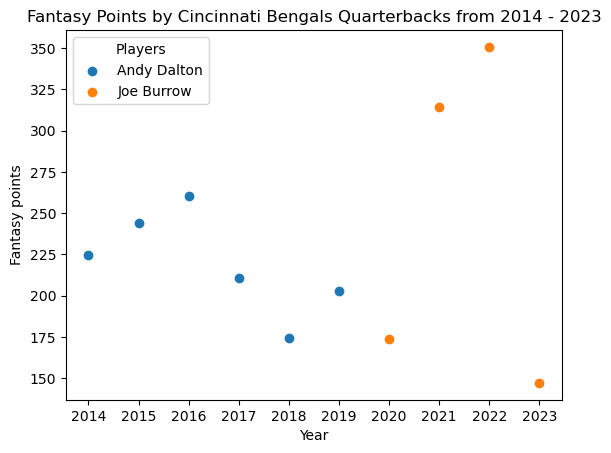

In [321]:
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
fig1, ax1 = plt.subplots()

for player in qb_df['Player'].unique(): 
    player_data = qb_df[qb_df['Player'] == player] 
    ax1.scatter(player_data['Year'], player_data['Fantasy Points'], label=player)

plt.xticks(years)
plt.legend(title = 'Players')
ax1.set_xlabel('Year')
ax1.set_ylabel('Fantasy points')
ax1.set_title('Fantasy Points by Cincinnati Bengals Quarterbacks from 2014 - 2023')

plt.show()

In [323]:
green = dfsBen[2].iloc[0:4]
boyd = dfsBen[3].iloc[2:5]
chase = dfsBen[4].iloc[0:3]

In [324]:
wr_df = pd.concat([green, boyd, chase])
wr_df['Player'] = ''
wr_df = wr_df.reset_index(drop = True)

In [325]:
wr_df = col_selection(wr_df)
wr_df.loc[:4, 'Player'] = 'AJ Green'
wr_df.loc[4:5, 'Player'] = 'Tyler Boyd'
wr_df.loc[6:, 'Player'] = 'Jamarr Chase'
wr_df

,Year,Team,Games Played,Fantasy Points,Player
0,2014,CIN,13,136.30,AJ Green
1,2015,CIN,16,187.70,AJ Green
2,2016,CIN,10,120.40,AJ Green
3,2017,CIN,16,151.80,AJ Green
4,2018,CIN,14,145.10,Tyler Boyd
5,2019,CIN,16,132.90,Tyler Boyd
6,2020,CIN,15,113.64,Jamarr Chase
7,2021,CIN,17,223.60,Jamarr Chase
8,2022,CIN,12,155.40,Jamarr Chase
9,2023,CIN,16,162.72,Jamarr Chase


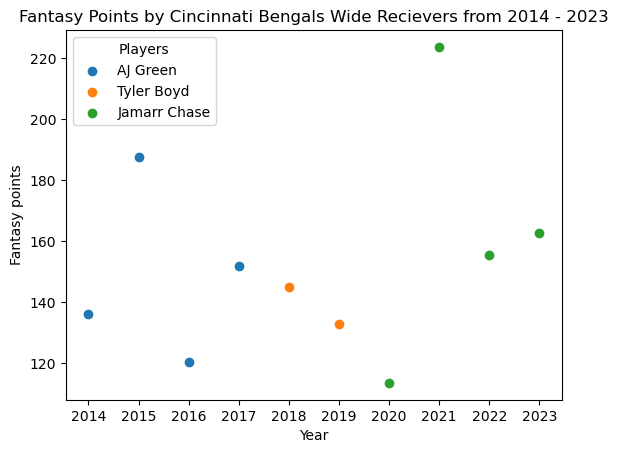

In [340]:
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
fig1, ax1 = plt.subplots()

for player in wr_df['Player'].unique(): 
    player_data = wr_df[wr_df['Player'] == player] 
    ax1.scatter(player_data['Year'], player_data['Fantasy Points'], label=player)

plt.xticks(years)
plt.legend(title = 'Players')
ax1.set_xlabel('Year')
ax1.set_ylabel('Fantasy points')
ax1.set_title('Fantasy Points by Cincinnati Bengals Wide Recievers from 2014 - 2023')

plt.show()

In [327]:
bernard = dfsBen[5].iloc[0:1]
hill = dfsBen[6].iloc[1:3]
mixon = dfsBen[7].iloc[0:7]

In [328]:
rb_df = pd.concat([bernard, hill, mixon])
rb_df['Player'] = ''
rb_df = rb_df.reset_index(drop = True)

In [329]:
rb_df = col_selection(rb_df)
rb_df.loc[:0, 'Player'] = 'Giovani Bernard'
rb_df.loc[1:2, 'Player'] = 'Jeremy Hill'
rb_df.loc[3:, 'Player'] = 'Joe Mixon'
rb_df

,Year,Team,Games Played,Fantasy Points,Player
0,2014,CIN,13,144.9,Giovani Bernard
1,2015,CIN,16,155.3,Jeremy Hill
2,2016,CIN,15,155.3,Jeremy Hill
3,2017,CIN,14,111.3,Joe Mixon
4,2018,CIN,14,200.4,Joe Mixon
5,2019,CIN,16,190.4,Joe Mixon
6,2020,CIN,6,78.6,Joe Mixon
7,2021,CIN,16,245.9,Joe Mixon
8,2022,CIN,14,179.5,Joe Mixon
9,2023,CIN,17,215.0,Joe Mixon


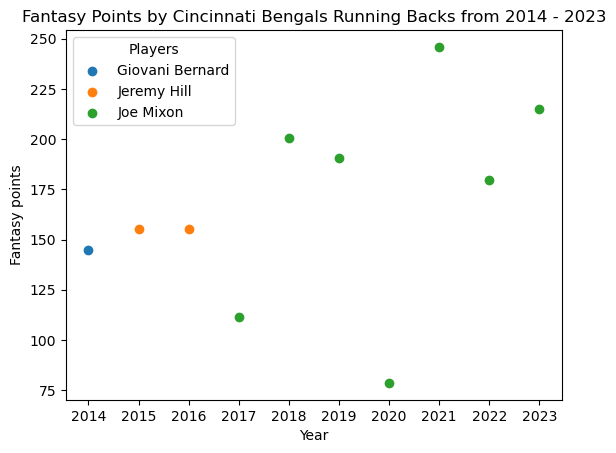

In [330]:
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
fig1, ax1 = plt.subplots()

for player in rb_df['Player'].unique(): 
    player_data = rb_df[rb_df['Player'] == player] 
    ax1.scatter(player_data['Year'], player_data['Fantasy Points'], label=player)

plt.xticks(years)
plt.legend(title = 'Players')
ax1.set_xlabel('Year')
ax1.set_ylabel('Fantasy points')
ax1.set_title('Fantasy Points by Cincinnati Bengals Running Backs from 2014 - 2023')

plt.show()

In [352]:
gresham = dfsBen[8].iloc[0:1]
eifert = dfsBen[9].iloc[1:2]
kroft = dfsBen[10].iloc[1:3]
uzomah = dfsBen[11].iloc[3:5]
sample = dfsBen[12].iloc[1:5]
hurst = dfsBen[13].iloc[4:5]
hurst = hurst[hurst['Year'] == 2022]

In [353]:
te_df = pd.concat([gresham, eifert, kroft, uzomah, sample, hurst])
te_df['Player'] = ''
te_df = te_df.reset_index(drop = True)

In [359]:
te_df = col_selection(te_df)

te_df = pd.concat([te_df, hurst], ignore_index=True)
te_df.loc[0, 'Player'] = 'Jermaine Gresham'
te_df.loc[1, 'Player'] = 'Tyler Eifert'
te_df.loc[2:3, 'Player'] = 'Tyler Kroft'
te_df.loc[4:5, 'Player'] = 'CJ Uzomah'
te_df.loc[6:8, 'Player'] = 'Drew Sample'
te_df = te_df[~((te_df['Player'] == 'Drew Sample') & (te_df['Year'] == 2022))]
te_df.loc[9, 'Player'] = 'Hayden Hurst'
te_df = te_df.sort_values(by='Year').reset_index(drop=True)

te_df

,Year,Team,Games Played,Fantasy Points,Player
0,2014,CIN,15.0,76.0,Jermaine Gresham
1,2015,CIN,13.0,139.5,Tyler Eifert
2,2016,CIN,14.0,9.2,Tyler Kroft
3,2017,CIN,16.0,82.4,Tyler Kroft
4,2018,CIN,16.0,61.9,CJ Uzomah
5,2019,CIN,16.0,36.2,CJ Uzomah
6,2020,CIN,16.0,38.9,Drew Sample
7,2021,CIN,17.0,8.1,Drew Sample
8,2022,CIN,13.0,53.4,Hayden Hurst
9,2023,CIN,17.0,28.4,Drew Sample


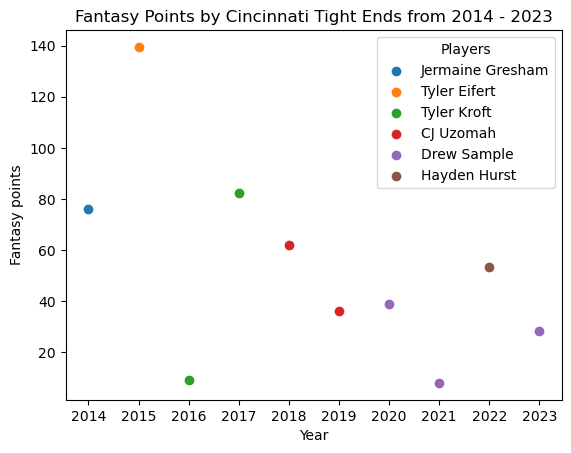

In [360]:
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
fig1, ax1 = plt.subplots()

for player in te_df['Player'].unique(): 
    player_data = te_df[te_df['Player'] == player] 
    ax1.scatter(player_data['Year'], player_data['Fantasy Points'], label=player)

plt.xticks(years)
plt.legend(title = 'Players')
ax1.set_xlabel('Year')
ax1.set_ylabel('Fantasy points')
ax1.set_title('Fantasy Points by Cincinnati Tight Ends from 2014 - 2023')

plt.show()

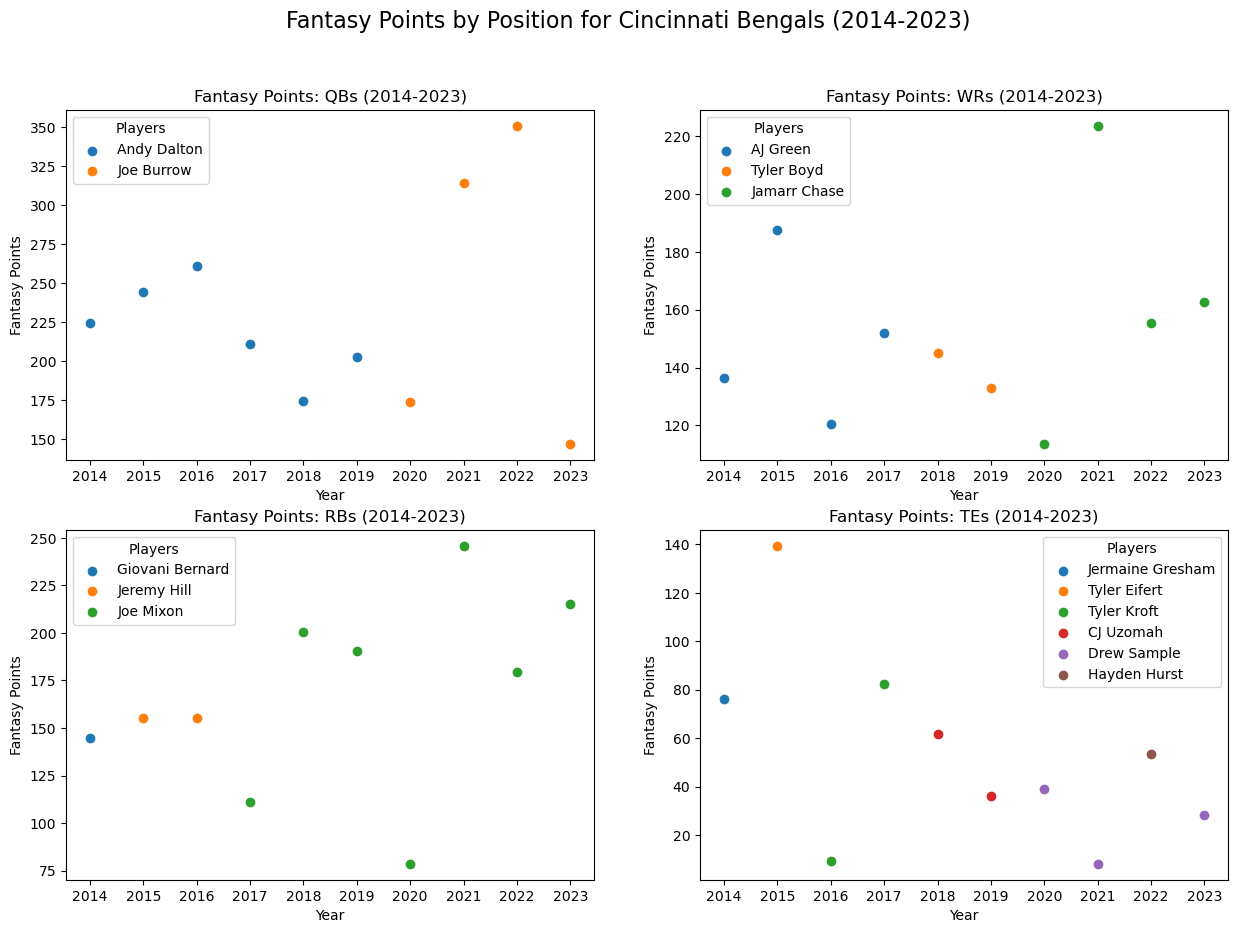

In [361]:
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
fig1, ax1 = plt.subplots(2, 2, figsize=(15, 10))

for player in qb_df['Player'].unique(): 
    player_data = qb_df[qb_df['Player'] == player] 
    ax1[0,0].scatter(player_data['Year'], player_data['Fantasy Points'], label=player)
ax1[0,0].set_xlabel('Year')
ax1[0,0].set_ylabel('Fantasy Points')
ax1[0,0].set_title('Fantasy Points: QBs (2014-2023)')
ax1[0,0].set_xticks(years) 
ax1[0,0].legend(title='Players')

for player in wr_df['Player'].unique(): 
    player_data = wr_df[wr_df['Player'] == player] 
    ax1[0,1].scatter(player_data['Year'], player_data['Fantasy Points'], label=player)
ax1[0,1].set_xlabel('Year')
ax1[0,1].set_ylabel('Fantasy Points')
ax1[0,1].set_title('Fantasy Points: WRs (2014-2023)')
ax1[0,1].set_xticks(years)
ax1[0,1].legend(title='Players')

for player in rb_df['Player'].unique(): 
    player_data = rb_df[rb_df['Player'] == player] 
    ax1[1,0].scatter(player_data['Year'], player_data['Fantasy Points'], label=player)
ax1[1,0].set_xlabel('Year')
ax1[1,0].set_ylabel('Fantasy Points')
ax1[1,0].set_title('Fantasy Points: RBs (2014-2023)')
ax1[1,0].set_xticks(years)
ax1[1,0].legend(title='Players')

for player in te_df['Player'].unique(): 
    player_data = te_df[te_df['Player'] == player] 
    ax1[1,1].scatter(player_data['Year'], player_data['Fantasy Points'], label=player)
ax1[1,1].set_xlabel('Year')
ax1[1,1].set_ylabel('Fantasy Points')
ax1[1,1].set_title('Fantasy Points: TEs (2014-2023)')
ax1[1,1].set_xticks(years)
ax1[1,1].legend(title='Players')

fig1.suptitle('Fantasy Points by Position for Cincinnati Bengals (2014-2023)', fontsize=16)
plt.show()

The graph above is the final graph that combines all of the position groups for the Cincinatti Bengals. The data that all these graphs show are the values from the different positions. This helps to visualize how all of the position groups have scored since 2014 to 2023. For example, the TE group has some of the least scoring in fantasy over the last 10 years, while the QB group shows the highest scoring over the last 10 years. This shows how the Cincinatti Bengals use TEs a lot less in their offensive schemes than some other teams do. This is very interesting to see because this will vary team by team, depending on the type of offensive scheme a team runs. It will be very interesing to see once I have the graphs for all of the other AFC north teams how the different position groups perform on a team by team basis. What I have learned from just examining the Cincinatti position groups is that the amount of fantasy points majorly differs based on the way that the offense runs their scheme. This graph shows that the bengals are more of a Wide Reciever - pass heavy team since the wide reciever and quarterback position have the most fantasy points on the team. The limitations when comparing the four AFC north teams is going to be there is going to be a variance in the way that these teams sceme, for example for the Baltimore Ravens, the TE group may have a lot more fantasy points because their offensive scheme is more tight end heavy. This is going to make comparing direct position groups more innacurate.

In [338]:
qb_fantasy_points = qb_df['Fantasy Points'].sum()
wr_fantasy_points = wr_df['Fantasy Points'].sum()
te_fantasy_points = te_df['Fantasy Points'].sum()
rb_fantasy_points = rb_df['Fantasy Points'].sum()

cin_fantasy_points = qb_fantasy_points + wr_fantasy_points + te_fantasy_points + rb_fantasy_points

In [339]:
cin_fantasy_points

6043.34

The number above is the total amount of points scored by the Cincinatti Bengals position groups over the last 10 years. The conclusion for my analysis is going to consist of four of these numbers, comparing all of the different AFC north teams together. The comparison is going to be very easy, as I will just look at which team scored the most overall, solving part of my analysis, which was taking a look at which team scored the most in the last 10 years. The deeper part of my analysis is going to come as I want to compare the position groups for the different teams to see which team has had a more consisten position group for fantasy. Overall, the take away for this project is going to be which team has produced the best position groups for fantasy over the last 10 years.